In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
# Load the data

import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'autompg-dataset' dataset.
Path to dataset files: /kaggle/input/autompg-dataset


In [ ]:
df = pd.read_csv(path + "/auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# trying to conver the col
df['horsepower'].astype('float64')

ValueError: could not convert string to float: '?'

In [ ]:
# ? ----> nan
df.replace("?", np.nan, inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [ ]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:

for i in df.columns:
  print(df[df[i]=="?"].shape)

(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)


In [ ]:
# EDA



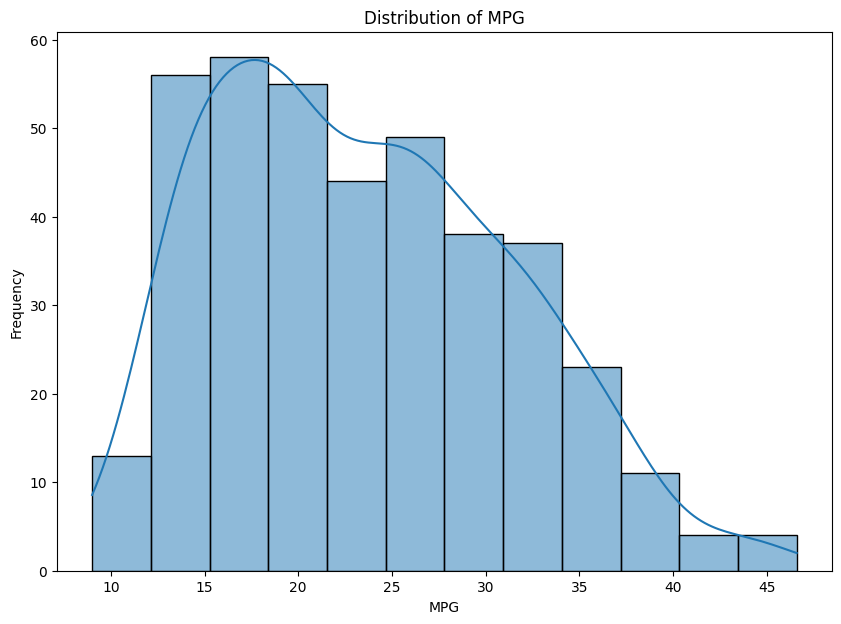

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df['mpg'], kde=True)
plt.title("Distribution of MPG")
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='horsepower', ylabel='mpg'>

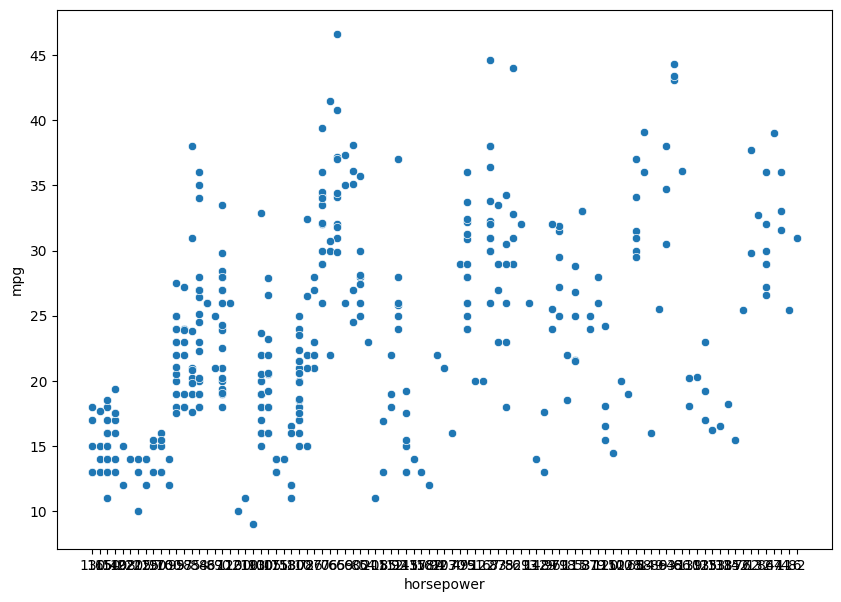

In [ ]:
#Scatter

plt.figure(figsize=(10,7))
sns.scatterplot(x=df['horsepower'], y=df['mpg'])

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

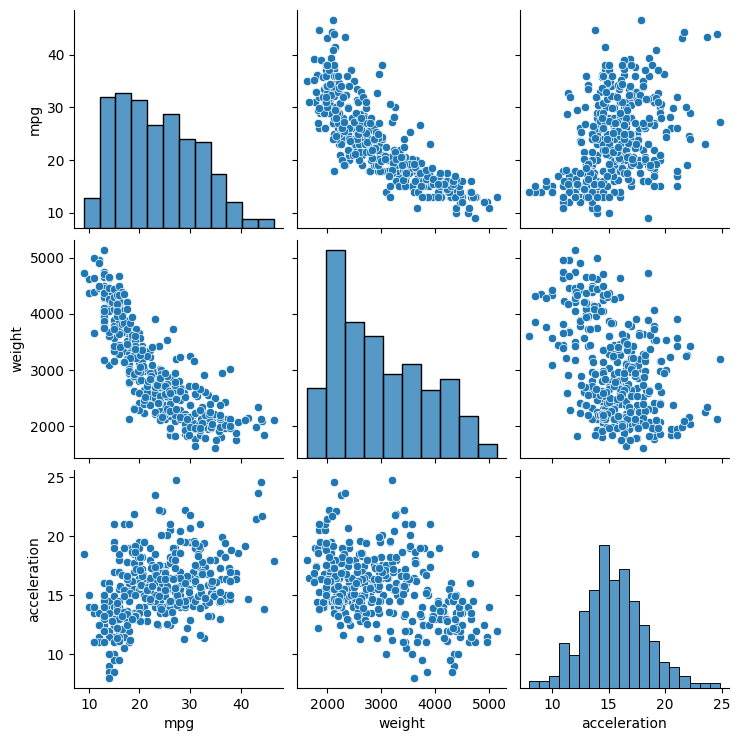

In [ ]:
sns.pairplot(df[['mpg','horsepower', 'weight','acceleration']])
plt.show()

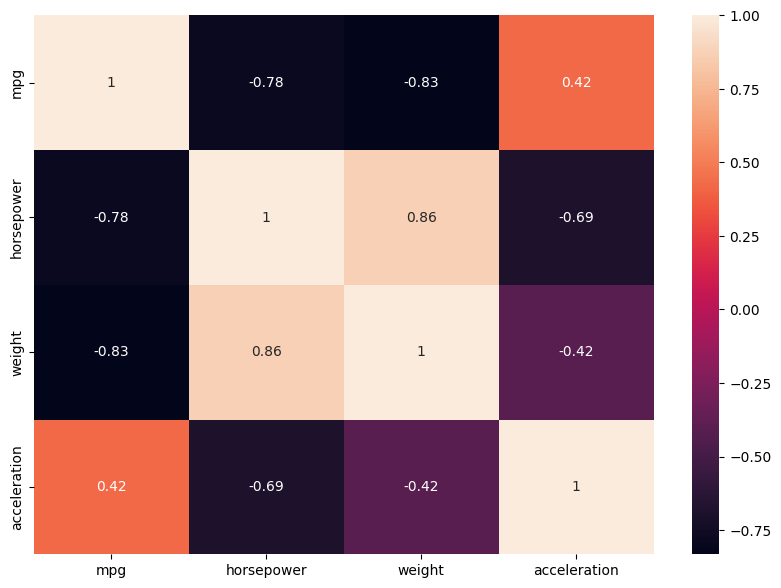

In [ ]:
# Correlation heapmap


plt.figure(figsize=(10,7))
sns.heatmap(df[['mpg','horsepower', 'weight','acceleration']].corr(), annot=True)
plt.show()

<Axes: xlabel='horsepower', ylabel='Count'>

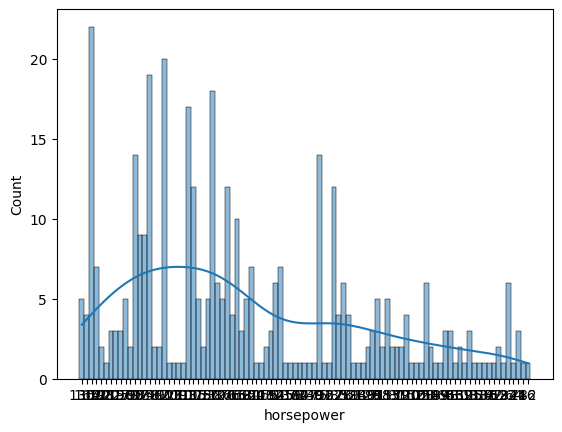

In [ ]:
# look for outlier
# try Lasso, Ridge , Gradboost, Xgboost 😎🏋🏼🏋🏼🏋🏼🏋🏼

df['horsepower']

sns.histplot(df['horsepower'], kde=True)
